
<table>
    <tr>
      <td>Introducción a
      </td>
      <td>
      <img src="https://media.licdn.com/dms/image/D5612AQF7GSp3l4pztQ/article-cover_image-shrink_720_1280/0/1686548640655?e=1715817600&v=beta&t=WQzv1EMkEEwZ0QZ0PF1anRKIHCl5BBH_YPZHdDQsWPM"  width=150/>
      </td>
     </tr>
</table>

### Regresión con intervalo de confianza
Carga de datos

In [46]:
import yfinance as yf
import pandas as pd
import datetime

# obtiene todas las cotizaciones posibles del símbolo que se le pasa como parámetro
def obten_símbolo(símbolo,sufijo):
  data = yf.Ticker(símbolo)
  start_date = '2010-01-01'
  end_date = datetime.datetime.now().strftime('%Y-%m-%d')
  df = data.history(start=start_date,end=end_date)[["Close"	]]
  df.columns = [ c+"_"+sufijo for c in df.columns]
  return df

msft = obten_símbolo("MSFT","MSFT")
aapl = obten_símbolo("AAPL","AAPL")
googl = obten_símbolo("GOOGL","GOOGL")
meta = obten_símbolo("META","META")
df = pd.concat([msft,aapl,googl,meta],axis=1).dropna()
df

,Close_MSFT,Close_AAPL,Close_GOOGL,Close_META
Date,,,,
2012-05-18 00:00:00-04:00,23.528461,16.036406,15.025025,38.189480
2012-05-21 00:00:00-04:00,23.914299,16.970686,15.368118,33.993931
2012-05-22 00:00:00-04:00,23.922340,16.840380,15.035035,30.967144
2012-05-23 00:00:00-04:00,23.399851,17.251282,15.251752,31.966084
2012-05-24 00:00:00-04:00,23.367691,17.092840,15.106607,32.994991
...,...,...,...,...
2024-03-11 00:00:00-04:00,404.519989,172.750000,137.669998,483.589996
2024-03-12 00:00:00-04:00,415.279999,173.229996,138.500000,499.750000
2024-03-13 00:00:00-04:00,415.100006,171.130005,139.789993,495.570007


In [47]:
df.corr()

,Close_MSFT,Close_AAPL,Close_GOOGL,Close_META
Close_MSFT,1.000000,0.985586,0.978346,0.869542
Close_AAPL,0.985586,1.000000,0.965057,0.810145
Close_GOOGL,0.978346,0.965057,1.000000,0.887321
Close_META,0.869542,0.810145,0.887321,1.000000


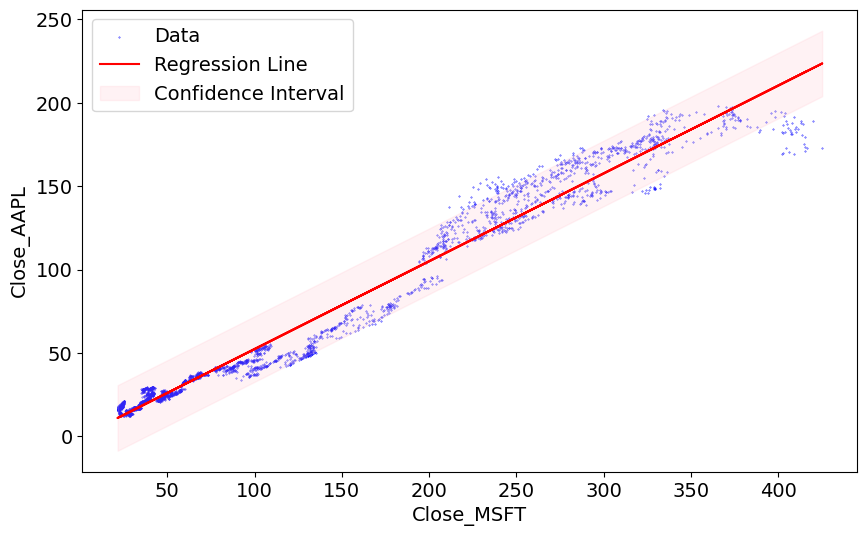

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
a = "Close_MSFT"
b = "Close_AAPL"

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df[a], df[b])

# Predicted values of B
df['predicted_B'] = intercept + slope * df[a]

residuos = df[b] - df['predicted_B']

# Calculando la desviación estándar de los residuos
desviacion_tipica = np.std(residuos)

# Confidence interval
ci = 2 * desviacion_tipica

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of A vs B
ax.scatter(df[a], df[b], color='blue', label='Data',s=0.1)

# Regression line
ax.plot(df[a], df['predicted_B'], color='red', label='Regression Line')

# Confidence interval
mina,maxa = df[a].min(),df[a].max()
minb,maxb = intercept + slope * mina, intercept + slope * maxa
ax.fill_between([mina,maxa], [minb-ci,maxb-ci], [minb+ci,maxb+ci],
                color='pink', alpha=0.2, label='Confidence Interval')

plt.xlabel(a)
plt.ylabel(b)
plt.legend()
plt.show()


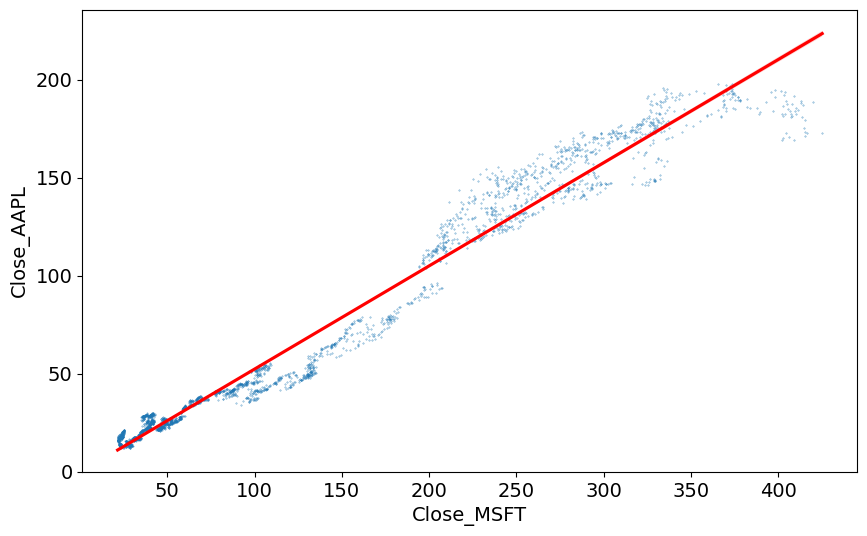

In [59]:
import seaborn as sns
a = "Close_MSFT"
b = "Close_AAPL"
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=df, x=a, y=b, ax=ax, line_kws=dict(color="r"), scatter_kws={'s': 0.1})
plt.show()

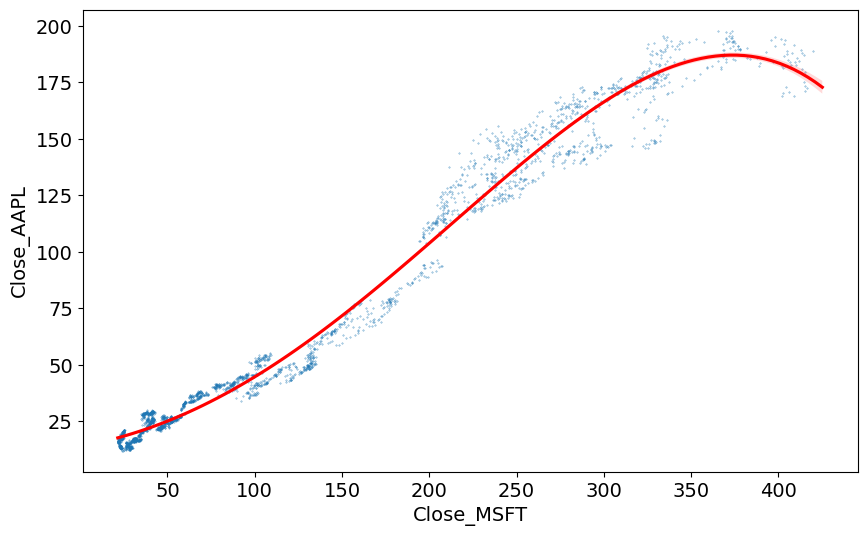

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df, x=a, y=b, ax=ax, line_kws=dict(color="r"), scatter_kws={'s': 0.1}, order=4)
plt.show()